In [11]:
import numpy as np
import argparse
import pandas as pd
import os
import sys 
sys.path.insert(0,"..")
import torch
from torchxrayvision.datasets import CT_Dataset
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from torchxrayvision.autoencoders import ResNetAE50
import torchvision
import torchxrayvision as xrv
import sklearn, sklearn.model_selection

In [12]:
transforms = torchvision.transforms.Compose([xrv.datasets.XRayCenterCrop(),xrv.datasets.XRayResizer(224)])

Setting XRayResizer engine to cv2 could increase performance.


In [13]:
dataset = xrv.datasets.CT_Dataset(
        imgpath = "/dataNAS/people/lblankem/", 
        transform=transforms, data_aug=None, unique_patients=False)

datas = []
datas_names = []
datas.append(dataset)
datas_names.append("ct")

                                                fullname         mrn  \
0      AC421326a-AC421363e_1.2.840.4267.32.1496163441...  25484585.0   
1      AC421326b-AC421363f_1.2.840.4267.32.3396896681...  27506039.0   
13     AC4213272-AC42140c8_1.2.840.4267.32.2218613666...  61174421.0   
18     AC4213275-AC4213649_1.2.840.4267.32.1442505479...  13045877.0   
19     AC4213276-AC421364a_1.2.840.4267.32.1801448574...  26456970.0   
...                                                  ...         ...   
14626  AC4244a08-AC4244ce7_1.2.840.4267.32.3439192758...  21284484.0   
14644  AC4244a7d-AC4244db4_1.2.840.4267.32.2563503217...  20836912.0   
14647  AC4244a86-AC4244dc1_1.2.840.4267.32.1838271074...  23871338.0   
14659  AC4244ae6-AC4244e6e_1.2.840.4267.32.1244100542...  15182348.0   
14665  AC4244b1c-AC4244ec0_1.2.840.4267.32.3636005877...  40939845.0   

       accession   anon_mrn anon_accession  days_jitter  \
0        6971188  AC421326a      AC421363e         -4.0   
1        6827612 

In [14]:
train_datas = []
test_datas = []
for i, dataset in enumerate(datas):

    gss = sklearn.model_selection.GroupShuffleSplit(train_size=0.8,test_size=0.2, random_state=0)
    train_inds, test_inds = next(gss.split(X=range(len(dataset)), groups=dataset.csv.patientid))
    train_dataset = xrv.datasets.SubsetDataset(dataset, train_inds)
    test_dataset = xrv.datasets.SubsetDataset(dataset, test_inds)
    
    #disable data aug
    #test_dataset.data_aug = None #Louis commented this out
    
    train_datas.append(train_dataset)
    test_datas.append(test_dataset)

In [15]:
print(test_dataset)

{'Atelectasis': {0: 446, 1: 153}}
SubsetDataset num_samples=599
└ of CT_Dataset


In [16]:
test_loader = torch.utils.data.DataLoader(test_dataset,
                                               batch_size=1,
                                               shuffle=False,
                                               num_workers=1)

In [41]:
model = xrv.autoencoders.SimpleAE(in_channels = 1, latent_dim = 2000)
model.load_state_dict(torch.load('../output_simple_l3/ct-SimpleAE-ct-e271.pt', map_location=torch.device('cpu'))['model_state_dict'])

<All keys matched successfully>

In [42]:
#model = xrv.autoencoders.ResNetAE50()
#model.load_state_dict(torch.load('../output_50_500_sig_elastic/ct-ResNetAE50-ct-e311.pt', map_location=torch.device('cpu'))['model_state_dict'])

In [43]:
#model = xrv.autoencoders.DFCVAE(in_channels = 1, latent_dim = 2000)
#model.load_state_dict(torch.load('../output_dfcvae_large_latent/ct-DFCVAE-ct-e311.pt', map_location=torch.device('cpu'))['model_state_dict'])

{'idx': tensor([2]), 'lab': tensor([0]), 'img': tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]], dtype=torch.float64)}
torch.Size([1, 1, 512, 512])
1.0
0.0


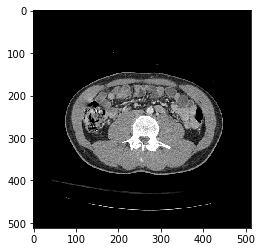

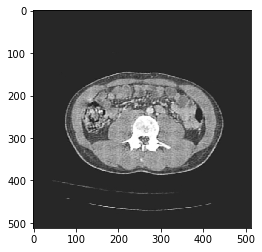

0.9999968
-0.17829674
{'idx': tensor([3]), 'lab': tensor([0]), 'img': tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]], dtype=torch.float64)}
torch.Size([1, 1, 512, 512])
1.0
0.0


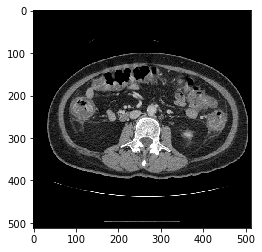

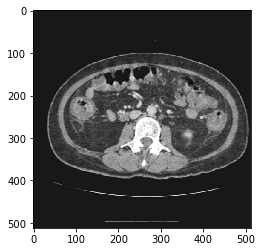

0.9999983
-0.10424947
{'idx': tensor([6]), 'lab': tensor([0]), 'img': tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]], dtype=torch.float64)}
torch.Size([1, 1, 512, 512])
1.0
0.0


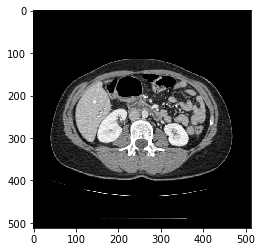

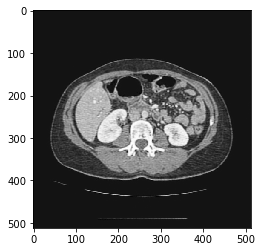

0.9976775
-0.08359187
{'idx': tensor([7]), 'lab': tensor([0]), 'img': tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]], dtype=torch.float64)}
torch.Size([1, 1, 512, 512])
1.0
0.0


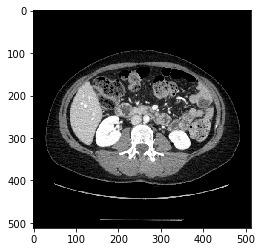

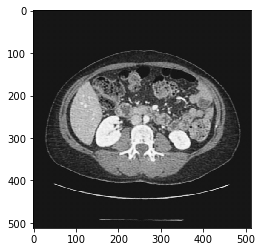

0.98690045
-0.09245385
{'idx': tensor([15]), 'lab': tensor([0]), 'img': tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]], dtype=torch.float64)}
torch.Size([1, 1, 512, 512])
1.0
0.0


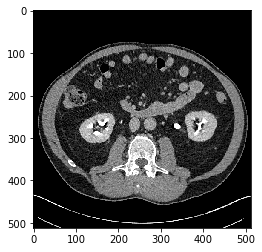

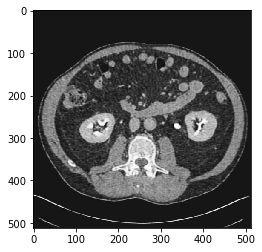

0.9950873
-0.095586985
{'idx': tensor([16]), 'lab': tensor([0]), 'img': tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]], dtype=torch.float64)}
torch.Size([1, 1, 512, 512])
1.0
0.0


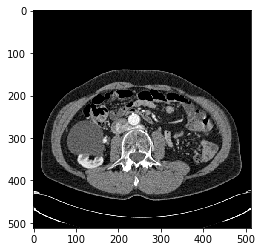

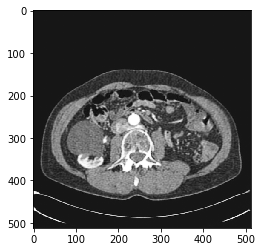

0.9999581
-0.09895598
{'idx': tensor([18]), 'lab': tensor([0]), 'img': tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]], dtype=torch.float64)}
torch.Size([1, 1, 512, 512])
1.0
0.0


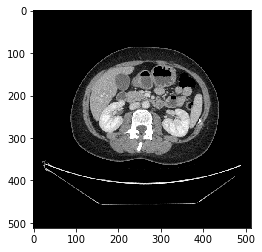

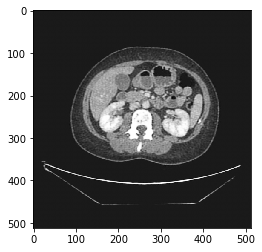

0.99997604
-0.11038837
{'idx': tensor([37]), 'lab': tensor([0]), 'img': tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]], dtype=torch.float64)}
torch.Size([1, 1, 512, 512])
1.0
0.0


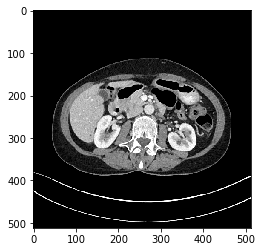

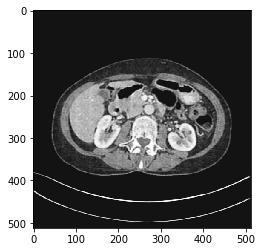

0.99497396
-0.079678394
{'idx': tensor([39]), 'lab': tensor([0]), 'img': tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]], dtype=torch.float64)}
torch.Size([1, 1, 512, 512])
1.0
0.0


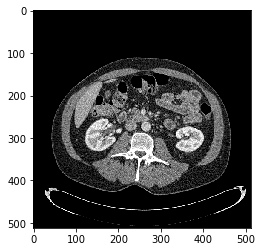

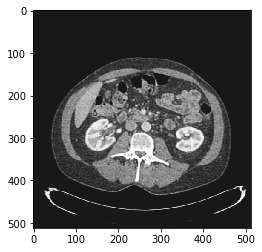

0.9996913
-0.10702952
{'idx': tensor([40]), 'lab': tensor([0]), 'img': tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]], dtype=torch.float64)}
torch.Size([1, 1, 512, 512])
1.0
0.0


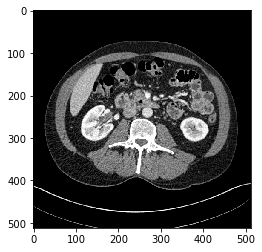

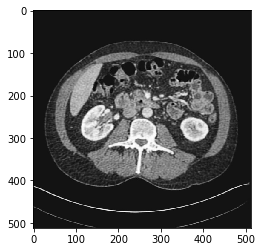

0.9883978
-0.08055905
{'idx': tensor([41]), 'lab': tensor([0]), 'img': tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]], dtype=torch.float64)}
torch.Size([1, 1, 512, 512])
1.0
0.0


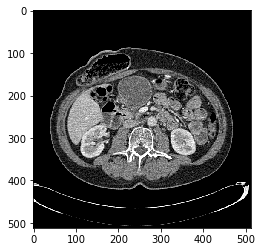

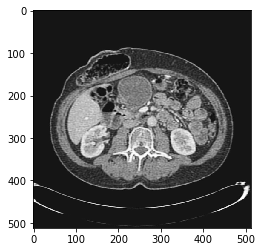

0.9989109
-0.09286327
{'idx': tensor([50]), 'lab': tensor([0]), 'img': tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]], dtype=torch.float64)}
torch.Size([1, 1, 512, 512])
1.0
0.0


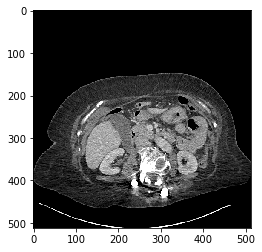

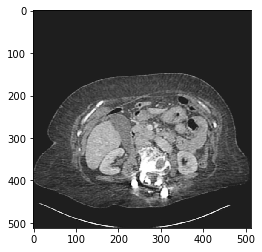

0.99984896
-0.1364267
{'idx': tensor([54]), 'lab': tensor([0]), 'img': tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]], dtype=torch.float64)}
torch.Size([1, 1, 512, 512])
1.0
0.0


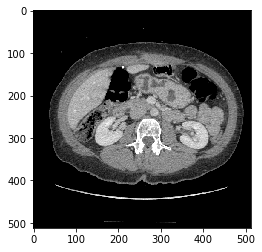

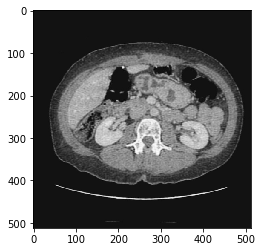

0.97139865
-0.07552814
{'idx': tensor([57]), 'lab': tensor([0]), 'img': tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]], dtype=torch.float64)}
torch.Size([1, 1, 512, 512])
1.0
0.0


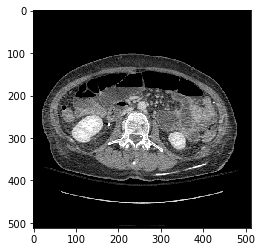

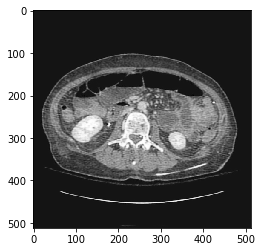

0.99635303
-0.0885413
{'idx': tensor([58]), 'lab': tensor([0]), 'img': tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]], dtype=torch.float64)}
torch.Size([1, 1, 512, 512])
1.0
0.0


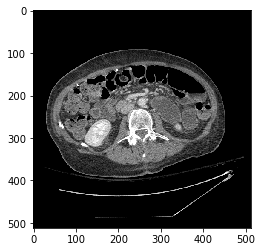

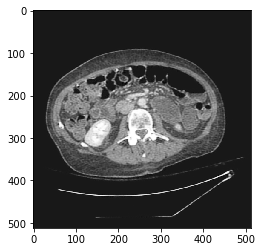

0.9999833
-0.106843375
{'idx': tensor([59]), 'lab': tensor([0]), 'img': tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]], dtype=torch.float64)}
torch.Size([1, 1, 512, 512])
1.0
0.0


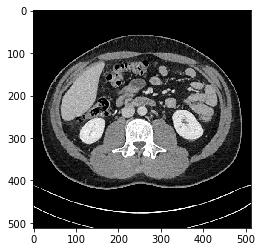

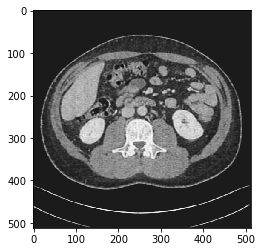

0.9591118
-0.117492504
{'idx': tensor([60]), 'lab': tensor([0]), 'img': tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]], dtype=torch.float64)}
torch.Size([1, 1, 512, 512])
1.0
0.0


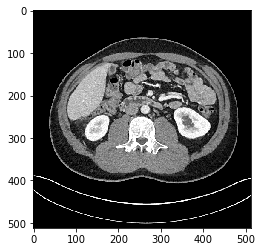

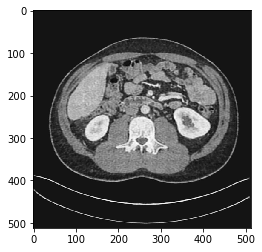

0.9482797
-0.08342869
{'idx': tensor([61]), 'lab': tensor([0]), 'img': tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]], dtype=torch.float64)}
torch.Size([1, 1, 512, 512])
1.0
0.0


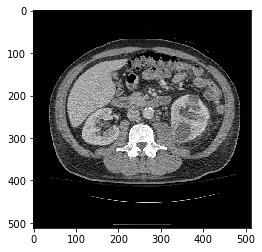

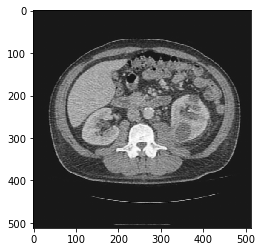

0.98117596
-0.10740686
{'idx': tensor([66]), 'lab': tensor([0]), 'img': tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]], dtype=torch.float64)}
torch.Size([1, 1, 512, 512])
1.0
0.0


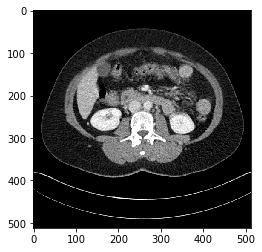

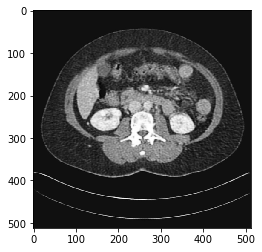

0.998632
-0.06741536
{'idx': tensor([67]), 'lab': tensor([0]), 'img': tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]], dtype=torch.float64)}
torch.Size([1, 1, 512, 512])
1.0
0.0


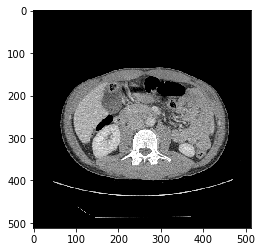

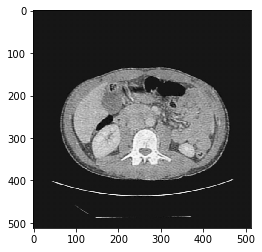

0.9820783
-0.09230531


In [44]:
i = 0
for data in test_loader:
    print(data)
    i += 1
    pytorch_img = data['img']
    pytorch_img = pytorch_img.float()
    img = data['img'][0][0].detach().numpy()
    print(pytorch_img.shape)
    print(np.max(img))
    print(np.min(img))
    plt.imshow(img, cmap = 'gray', interpolation='nearest')
    plt.show()
    ae_out = model(pytorch_img)
    output_img = ae_out['out'][0][0].detach().numpy()
    plt.imshow(output_img, cmap = 'gray', interpolation='nearest')
    plt.show()
    print(np.max(output_img))
    print(np.min(output_img))
    if i == 20:
        break